In [1]:
import numpy as np
import pandas as pd
import os.path

%matplotlib inline
import matplotlib.pyplot as plt

import sys
sys.path.insert(1, r'./../Python')
from helper import *

In [2]:
# This cell is solely for styling
import seaborn as sns
plt.style.use('seaborn')
plt.rcParams['grid.linestyle'] = "-"

The setup function ensures that everything in the input folder can be used. If pulled from Github, the input folder will only have zip files. This ensures that there are actual files in there that can be used as soon as the function is called.

The function also prints out each of the folder names that are in the Input folder.

In [3]:
setup()

../Input/AudioFiles
../Input/Docker
../Input/DockerV2
../Input/misc
../Input/NoProgram
../Input/Program


In [4]:
files = return_files('../Input/NoProgram')
files

['../Input/NoProgram/noProg.txt',
 '../Input/NoProgram/noProg2.txt',
 '../Input/NoProgram/noProg3.txt',
 '../Input/NoProgram/noProg4.txt',
 '../Input/NoProgram/noProg5.txt',
 '../Input/NoProgram/noProg6.txt',
 '../Input/NoProgram/noProg7.txt',
 '../Input/NoProgram/noProg8.txt']

In [5]:
from collections import namedtuple

Data = namedtuple('Data', ['cpu', 'mem', 'key'])

info_dicts = []
for file in files:
    cpu, mem, key = parse(file)
    data = Data(cpu, mem, key)
    info_dicts.append(data)

In [6]:
Dataframe = namedtuple('Dataframe', ['cpu', 'mem'])

In [7]:
dataframes = []
for t in info_dicts:
    cpu, mem = create_dataframe(t.cpu, t.mem, t.key)
    frame = Dataframe(cpu, mem)
    dataframes.append(frame)

In [8]:
dataframes[0].cpu.mean()

cron                  0.000433
dbus-daemon           0.000223
dirmngr               0.047779
docker-containe       1.353483
dockerd               1.881475
jbd2/mmcblk0p2-       0.011063
ksoftirqd/0           0.028808
kworker/0:0           0.040676
kworker/0:1           0.037743
kworker/0:2           0.064695
kworker/u2:2          0.007301
mmcqd/0               0.017745
ntpd                  0.020356
rsyslogd              0.016198
systemd               0.023215
systemd-journal       0.075981
systemd-logind        0.001336
systemd-udevd         0.007685
thd                   0.002425
top                   8.346257
vncagent              0.017609
vncserver-x11-c       0.064039
w1_bus_master1        7.604690
time               2020.000000
dtype: float64

In [9]:
def generate_means(dataframe):
    for col in dataframe:
        yield col, dataframe[col].mean()

In [10]:
means = []
for x in generate_means(dataframes[0].cpu):
    means.append(x)
    
means

[('cron', 0.00043311471352555376),
 ('dbus-daemon', 0.00022274470981314195),
 ('dirmngr', 0.04777874025491909),
 ('docker-containe', 1.3534834797673183),
 ('dockerd', 1.8814750649670553),
 ('jbd2/mmcblk0p2-', 0.011062987254052713),
 ('ksoftirqd/0', 0.02880831580249973),
 ('kworker/0:0', 0.040675658953099963),
 ('kworker/0:1', 0.03774285360722692),
 ('kworker/0:2', 0.06469496349461716),
 ('kworker/u2:2', 0.00730107659943076),
 ('mmcqd/0', 0.01774532854844697),
 ('ntpd', 0.020356391535701034),
 ('rsyslogd', 0.0161984902858557),
 ('systemd', 0.02321494864496969),
 ('systemd-journal', 0.07598069545848285),
 ('systemd-logind', 0.0013364682588788517),
 ('systemd-udevd', 0.007684692488553395),
 ('thd', 0.002425442395743102),
 ('top', 8.34625665140442),
 ('vncagent', 0.017609206781338944),
 ('vncserver-x11-c', 0.0640391040712785),
 ('w1_bus_master1', 7.604690013612178),
 ('time', 2020.0)]

In [11]:
def top5_means(dataframe):
    '''
    Put in a dataframe and ths function will output a list of the top 5
    processes by mean
    '''
    
    means = []
    count = 0
    for x in generate_means(dataframe):
        if x[0] == 'time':
            pass
        else:
            means.append(x)
            
    means.sort(key = lambda tup: tup[1], reverse = True)
    return means[:5]

In [12]:
means = top5_means(dataframes[0].cpu)
means

[('top', 8.34625665140442),
 ('w1_bus_master1', 7.604690013612178),
 ('dockerd', 1.8814750649670553),
 ('docker-containe', 1.3534834797673183),
 ('systemd-journal', 0.07598069545848285)]

In [13]:
def prep_plotting(means):
    to_plot = []
    for x in means:
        to_plot.append(x[0])
        
    return to_plot

In [14]:
def stack_plot(dataframe, labels, span = [100, 200],
               colors = ["#7bb274", "#a8a495", "#feb308", "#3778bf", "#825f87", '#d9544d', '#ffff7e', '#3b5b92']):
    plt.figure(figsize = (20, 14))

    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[to_plot[0]][100:200], color = colors[0])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[to_plot[1]][100:200], color = colors[1])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[to_plot[2]][100:200], color = colors[2])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[to_plot[3]][100:200], color = colors[3])
    plt.stackplot(dataframe['time'][span[0]:span[1]], dataframe[to_plot[4]][100:200], color = colors[4])

    plt.legend(loc = 2, labels = to_plot, prop = {'size':20})

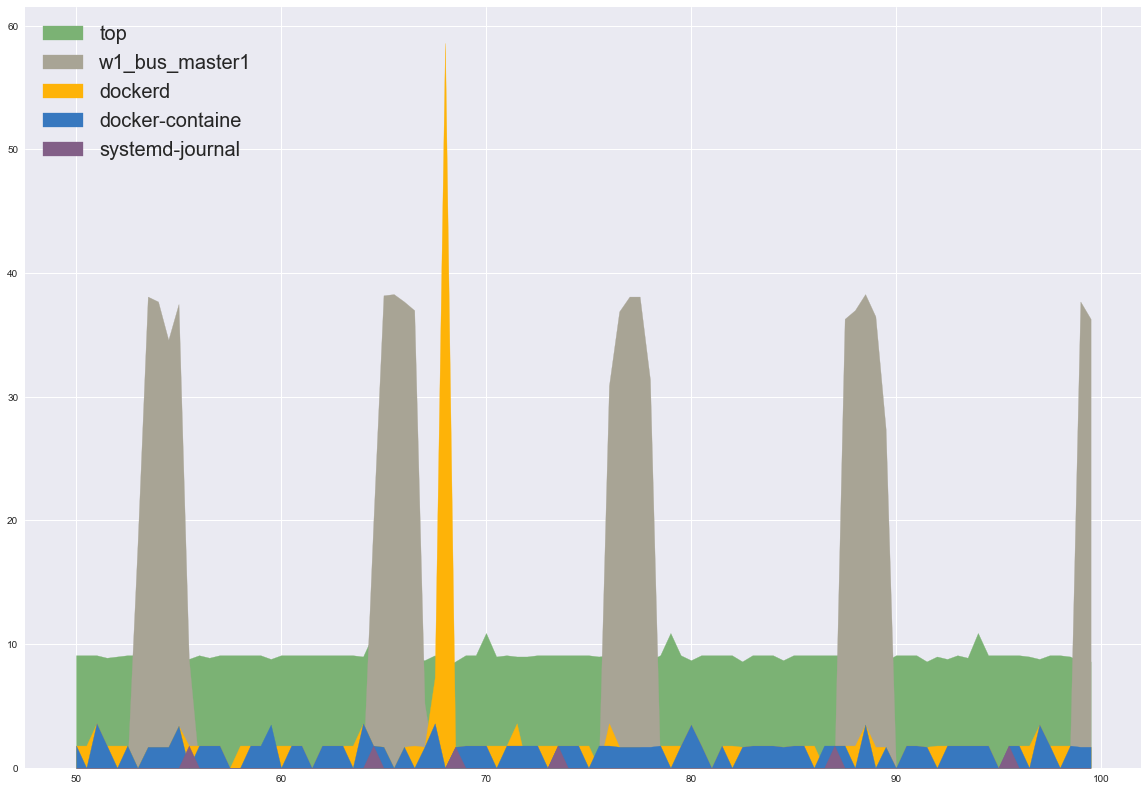

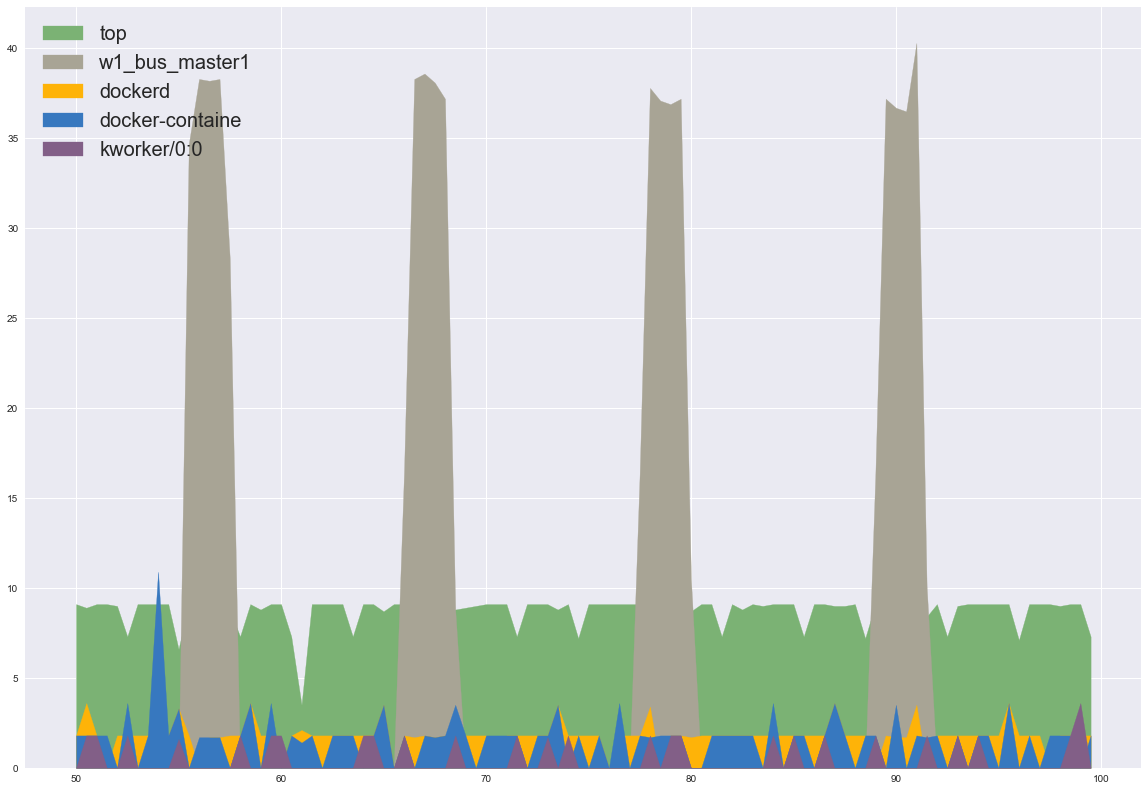

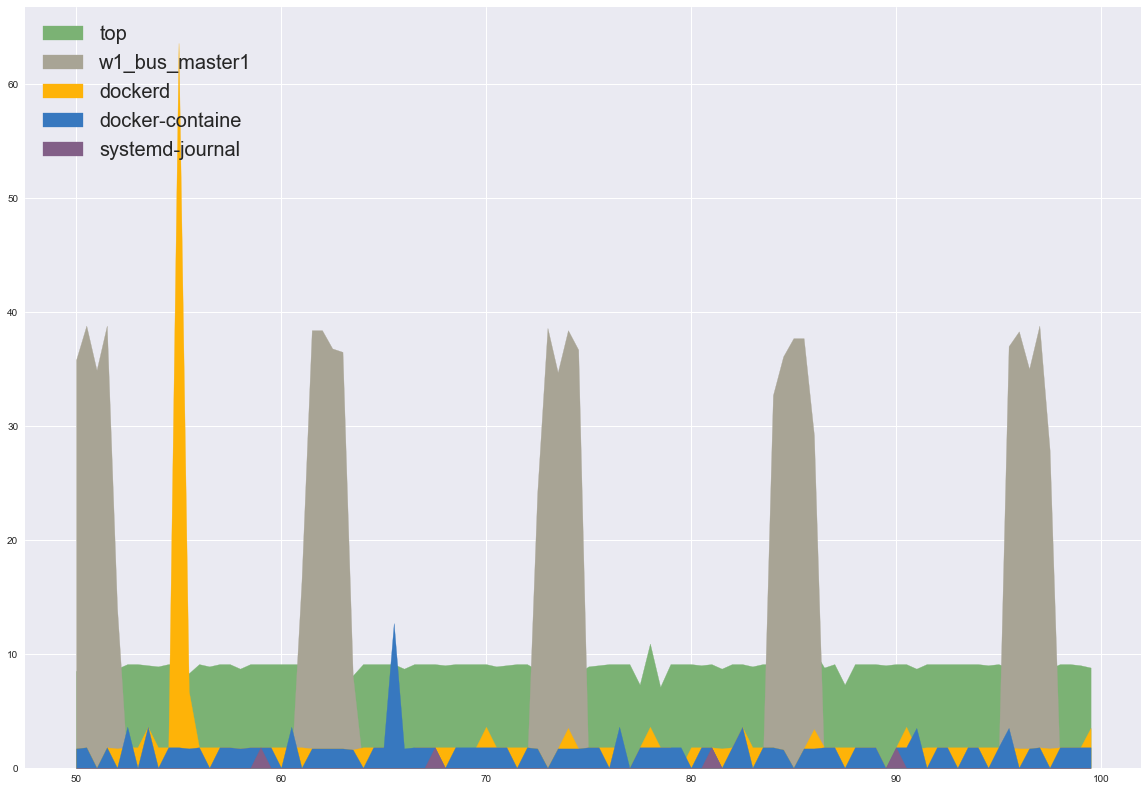

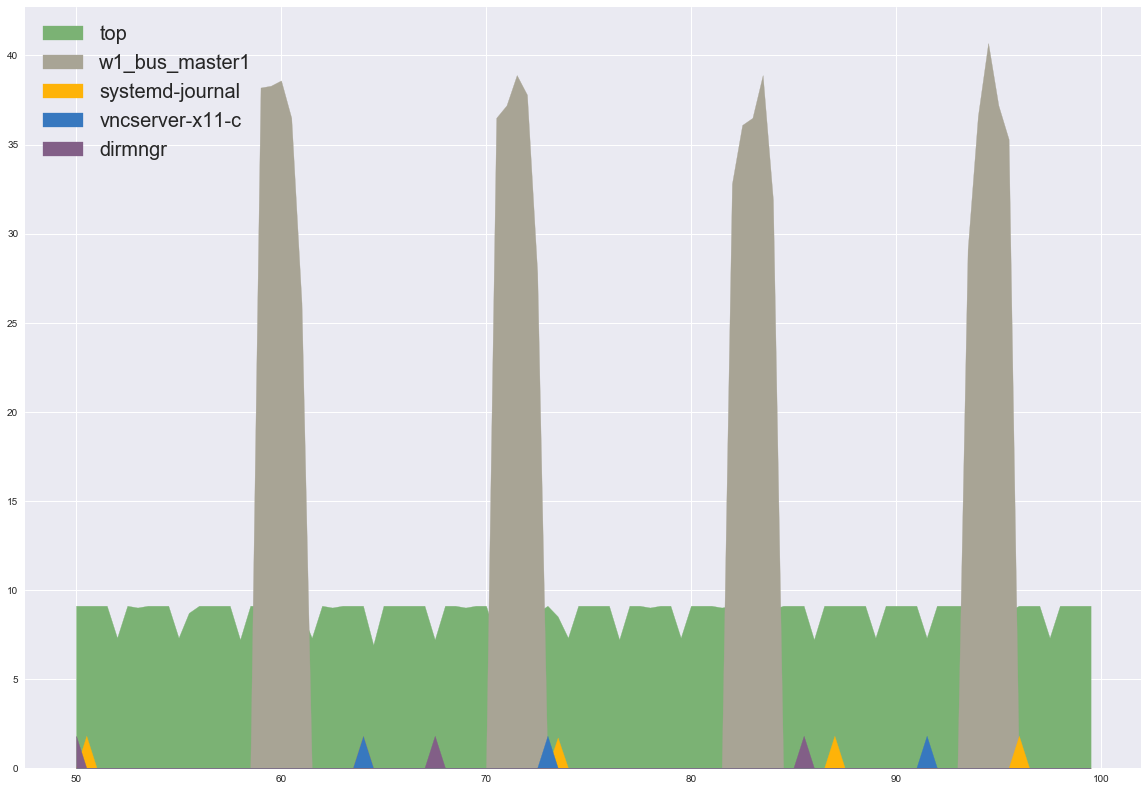

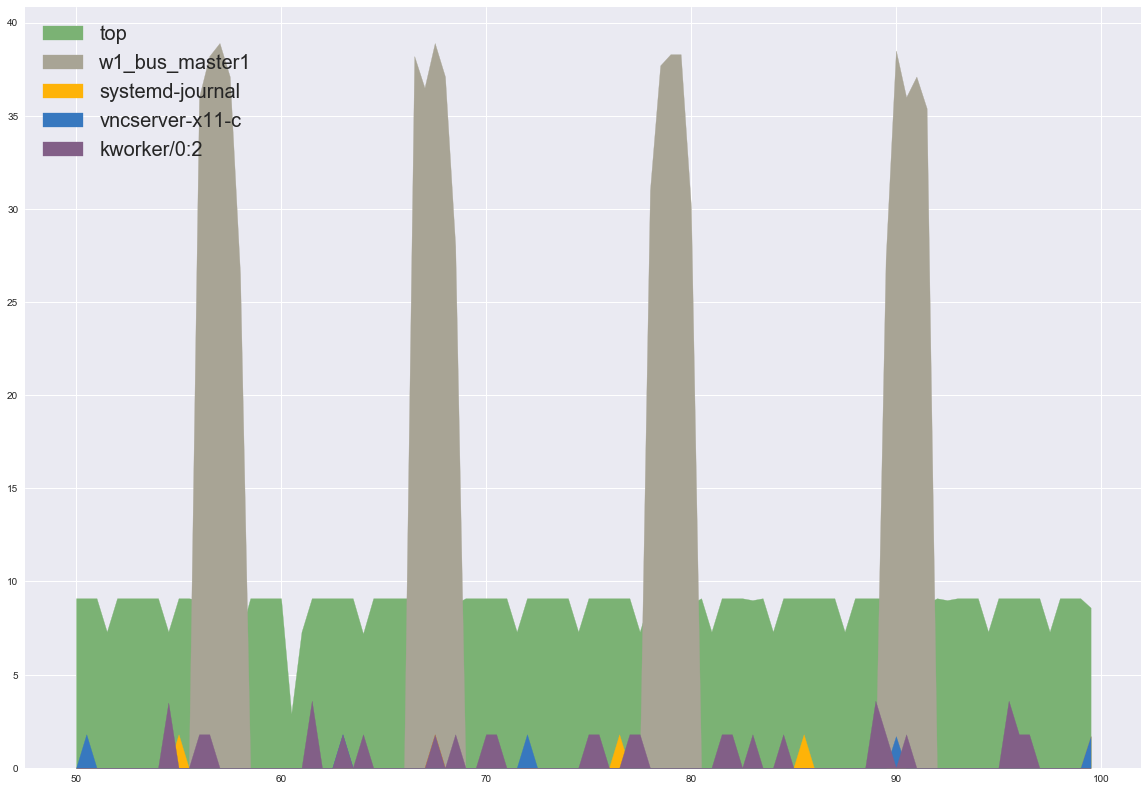

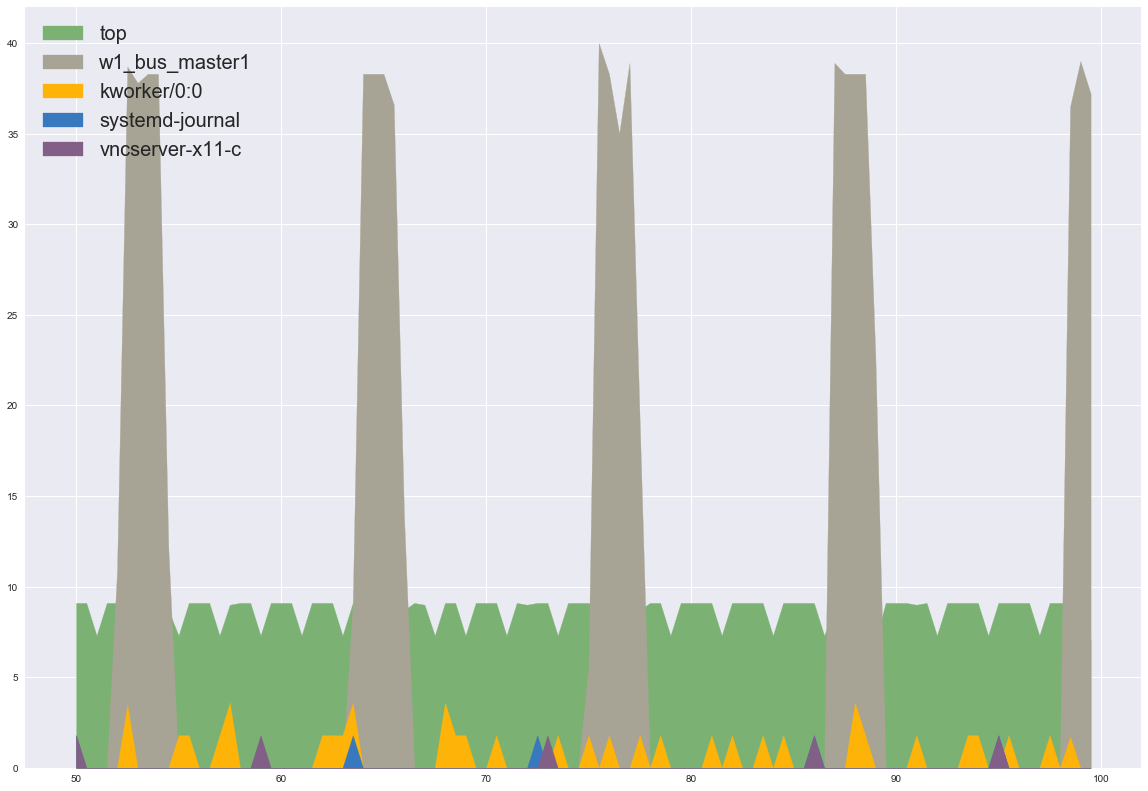

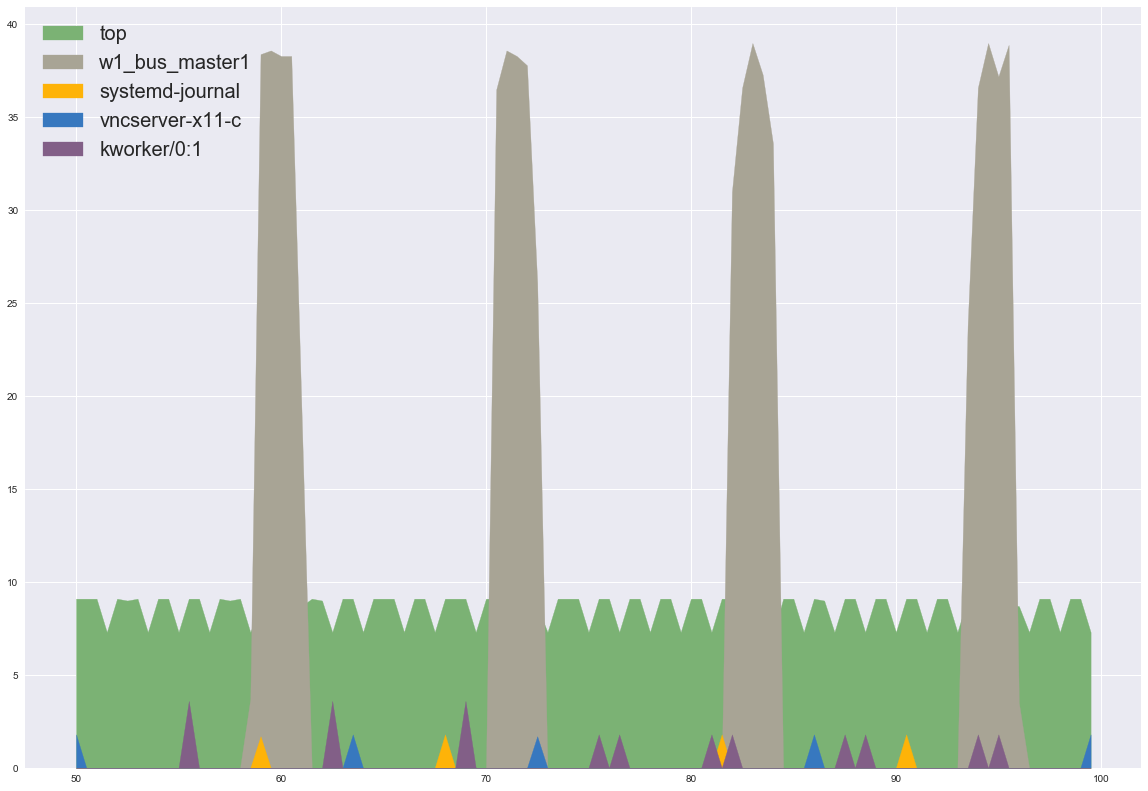

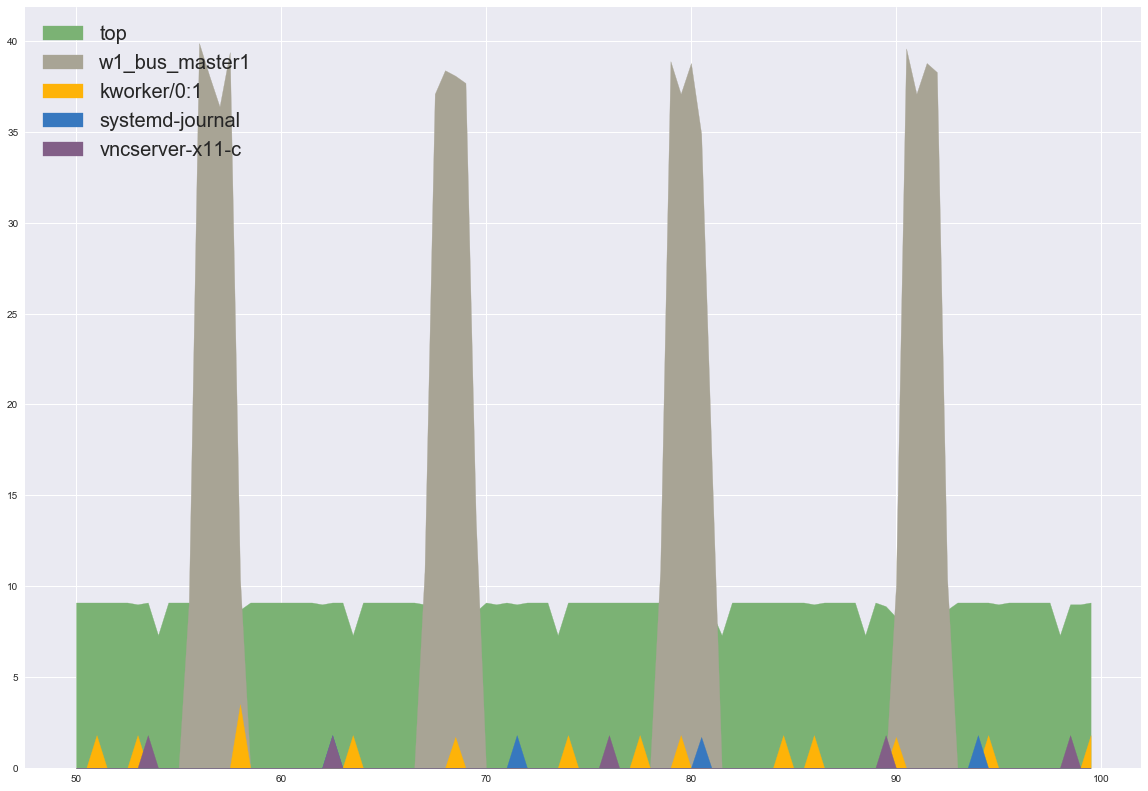

In [15]:
for frame in dataframes:
    means = top5_means(frame.cpu)
    to_plot = prep_plotting(means)
    stack_plot(frame.cpu, to_plot)
    plt.show()